<h1> 1. Data Download </h1>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prashant0000000","key":"70c322c218f596a359608e6ca71b2f7a"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nih-chest-xrays/data

100% 42.0G/42.0G [05:46<00:00, 115MB/s]
100% 42.0G/42.0G [05:46<00:00, 130MB/s]


In [ ]:
!unzip -q data.zip -d data/

<h1> 2. Exploratory Data Analysis </h1>

<h2> 2.1 Data Loading </h2>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# reading the data
data = pd.read_csv("/content/data/Data_Entry_2017.csv")
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [ ]:
print('shape of data : ',data.shape)

shape of data :  (112120, 12)


In [ ]:
data.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


<h2> 3.1 Data cleaning </h2>

In [ ]:
#drop unused columns
data = data[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]

# removing the rows which have patient_age >100
total = len(data)
print('No. of rows before removing rows having age >100 : ',len(data))
data = data[data['Patient Age']<100]
print('No. of rows after removing rows having age >100 : ',len(data))
print('No. of datapoints having age > 100 : ',total-len(data))

No. of rows before removing rows having age >100 :  112120
No. of rows after removing rows having age >100 :  112104
No. of datapoints having age > 100 :  16


In [ ]:
# rows having no. of disease
data['Labels_Count'] = data['Finding Labels'].apply(lambda text: len(text.split('|')) if(text != 'No Finding') else 0)

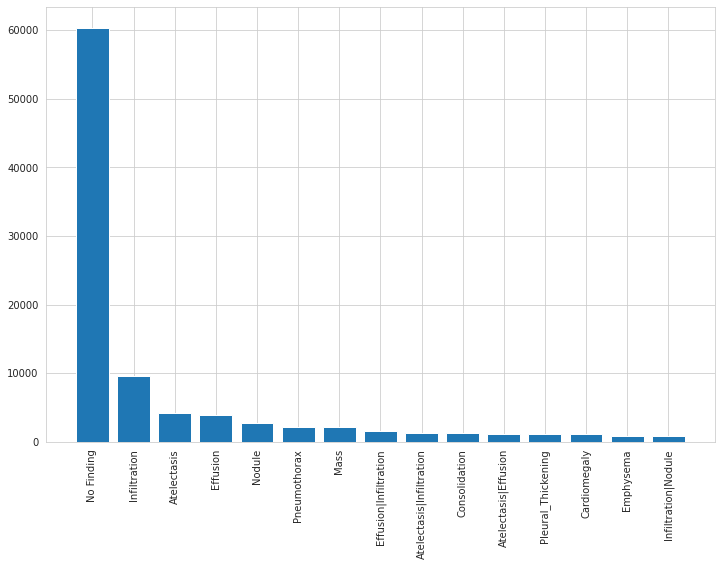

In [ ]:
label_counts = data['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

<h2> 3.2 Data analysis </h2>

<h3> 3.2.1 Age distribution </h3>

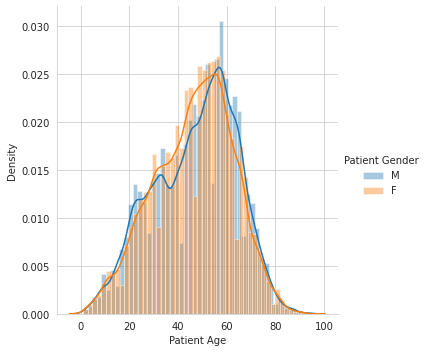

In [ ]:
#plt.figure(figsize=(20,15))
sns.FacetGrid(data,hue='Patient Gender',size=5).map(sns.distplot,'Patient Age').add_legend()
plt.show()

#### Observation - Both the gender have almost same distribution

<h3> 3.2.2 Disease distribution by age and sex </h3>

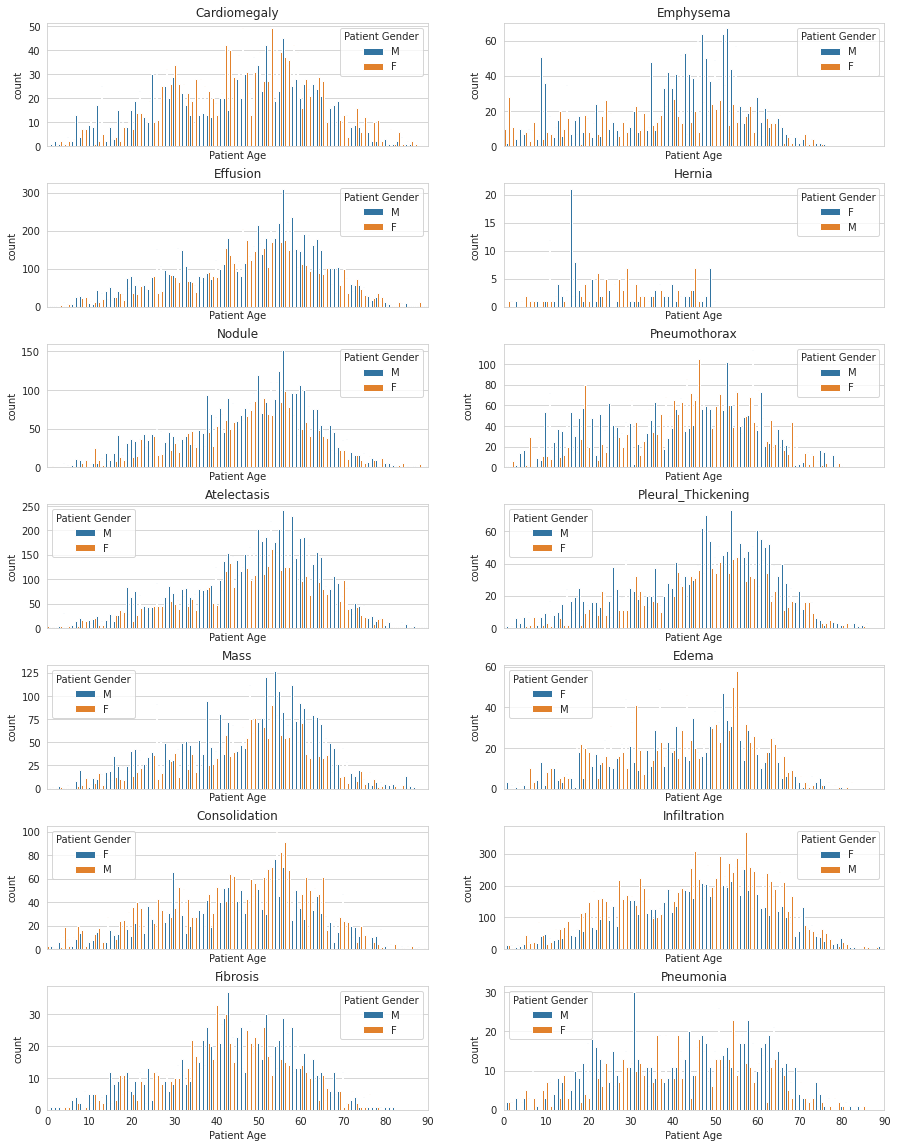

In [ ]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
df = data[data['Finding Labels'] != 'No Finding']
i=0
j=0
x=np.arange(0,100,10)
for pathology in pathology_list :
    index = []
    for k in range(len(df)):
        if pathology in df.iloc[k]['Finding Labels']:
            index.append(k)
    g=sns.countplot(x='Patient Age', hue="Patient Gender",data=df.iloc[index], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)

<h3> 3.2.3 No. of each disease by patient gender </h3>

In [ ]:
for pathology in pathology_list :
    data[pathology] = data['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

In [ ]:
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Labels_Count,Cardiomegaly,Emphysema,Effusion,...,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000001_000.png,Cardiomegaly,0,1,58,M,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


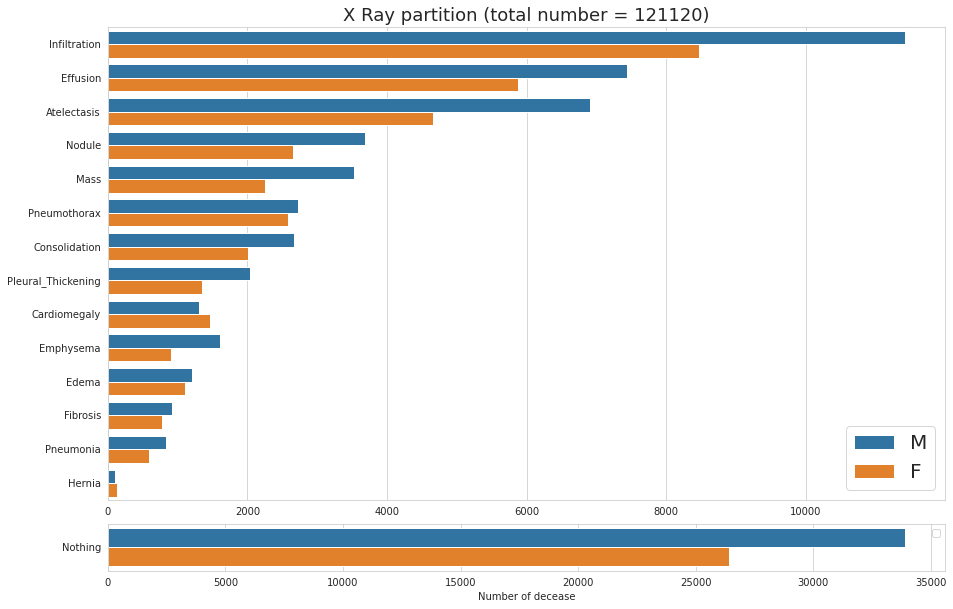

In [ ]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(data,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition (total number = 121120)',fontsize=18);

data['Nothing']=data['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(data,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

<h3> 3.2.5 ratio between one and multiple disease </h3>

In [ ]:
df=data.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=df[['|' in index for index in df.index]].copy()
df2=df[['|' not in index for index in df.index]]
df2=df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels']=df2.index.values
df1['Finding Labels']=df1.index.values

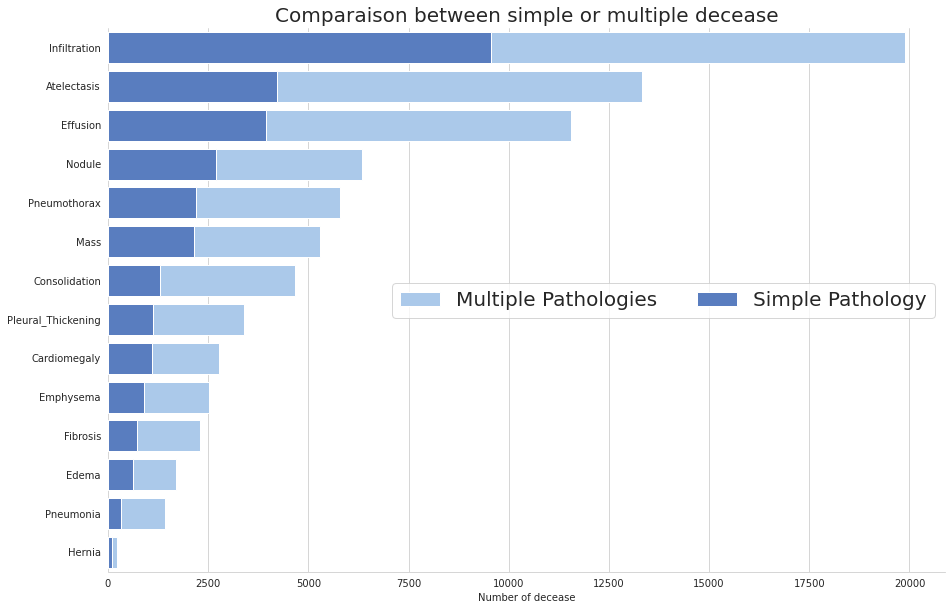

In [ ]:
f, ax = plt.subplots(sharex=True,figsize=(15, 10))
sns.set_color_codes("pastel")
g=sns.countplot(y='Category',data=data1, ax=ax, order = data1['Category'].value_counts().index,color='b',label="Multiple Pathologies")
sns.set_color_codes("muted")
g=sns.barplot(x='Patient ID',y='Finding Labels',data=df2, ax=ax, color="b",label="Simple Pathology")
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set( ylabel="",xlabel="Number of decease")
ax.set_title("Comparaison between simple or multiple decease",fontsize=20)
sns.despine(left=True)

<h3> 3.2.5 Plot most important pathologies groups for each desease </h3>

In [ ]:
#just keep groups of pathologies which appear more than 30 times
df3=df1.loc[df1['Patient ID']>30,['Patient ID','Finding Labels']]

for pathology in pathology_list:
    df3[pathology]=df3.apply(lambda x: x['Patient ID'] if pathology in x['Finding Labels'] else 0, axis=1)

df3.head(20)

,Patient ID,Finding Labels,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
Finding Labels,,,,,,,,,,,,,,,,
Effusion|Infiltration,1603,Effusion|Infiltration,0,0,1603,0,0,0,0,0,0,0,0,1603,0,0
Atelectasis|Infiltration,1350,Atelectasis|Infiltration,0,0,0,0,0,0,1350,0,0,0,0,1350,0,0
Atelectasis|Effusion,1165,Atelectasis|Effusion,0,0,1165,0,0,0,1165,0,0,0,0,0,0,0
Infiltration|Nodule,829,Infiltration|Nodule,0,0,0,0,829,0,0,0,0,0,0,829,0,0
Atelectasis|Effusion|Infiltration,737,Atelectasis|Effusion|Infiltration,0,0,737,0,0,0,737,0,0,0,0,737,0,0
Cardiomegaly|Effusion,484,Cardiomegaly|Effusion,484,0,484,0,0,0,0,0,0,0,0,0,0,0
Consolidation|Infiltration,441,Consolidation|Infiltration,0,0,0,0,0,0,0,0,0,0,441,441,0,0
Infiltration|Mass,418,Infiltration|Mass,0,0,0,0,0,0,0,0,418,0,0,418,0,0
Effusion|Pneumothorax,403,Effusion|Pneumothorax,0,0,403,0,0,403,0,0,0,0,0,0,0,0


#### Training

In [ ]:
import os
import cv2
import datetime
import random
import numpy as np
import pandas as pd
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping


print(tf.__version__)

2.9.2


In [ ]:
BATCH_SIZE = 8
EPOCHS = 30
IMAGE_SIZE = (224, 224)
VERBOSE = 1

REDUCE_DATA_SET_TO = 10000

random.seed(0)
tf.random.set_seed(0)

In [ ]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
for dirname, _, filenames in os.walk('/content/data'):
    print(dirname)

/content/data
/content/data/images_011
/content/data/images_011/images
/content/data/images_006
/content/data/images_006/images
/content/data/images_004
/content/data/images_004/images
/content/data/images_008
/content/data/images_008/images
/content/data/images_003
/content/data/images_003/images
/content/data/images_002
/content/data/images_002/images
/content/data/images_012
/content/data/images_012/images
/content/data/images_009
/content/data/images_009/images
/content/data/images_010
/content/data/images_010/images
/content/data/images_005
/content/data/images_005/images
/content/data/images_001
/content/data/images_001/images
/content/data/images_007
/content/data/images_007/images


In [ ]:
filenames = tf.io.gfile.glob('/content/data/*/*/*')
print(f'Number filenames: {len(filenames)}\n')
image_path_df = pd.DataFrame(data=filenames, index=[x.split('/')[-1] for x in filenames], columns=['filename'])
image_path_df[:3]

Number filenames: 112120



,filename
00029358_004.png,/content/data/images_012/images/00029358_004.png
00030730_000.png,/content/data/images_012/images/00030730_000.png
00029129_006.png,/content/data/images_012/images/00029129_006.png


In [ ]:
name_tails_set = set()

def get_junk_files(x):
    name_tail = x[-4:]
    name_tails_set.add(name_tail)

image_path_df['filename'].map(get_junk_files)

name_tails_set

{'.png'}

In [ ]:
Data_Entry_df = pd.read_csv('/content/data/Data_Entry_2017.csv')
Data_Entry_df[:3]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN


In [ ]:
file_target_df = pd.merge(image_path_df, Data_Entry_df[['Image Index', 'Finding Labels']], left_index=True, right_on='Image Index')
file_target_df.drop(columns=['Image Index'], axis=1, inplace=True)
file_target_df[:3]

,filename,Finding Labels
108341,/content/data/images_012/images/00029358_004.png,Cardiomegaly|Effusion
112009,/content/data/images_012/images/00030730_000.png,No Finding
107765,/content/data/images_012/images/00029129_006.png,No Finding


In [ ]:
classes_set = set()

def get_classes(x):
    a = x.split('|')
    for el in a:
        classes_set.add(el)
    return x

file_target_df['Finding Labels'].map(get_classes)
print(f'Number of classes: {len(classes_set)}\n')
classes_list = list(classes_set)
print(classes_list)

diseases_list = classes_list[:]
diseases_list.remove('No Finding')
diseases_list.sort()
print(f'\nNumber of diseases: {len(diseases_list)}\n')

print(diseases_list)

Number of classes: 15

['No Finding', 'Infiltration', 'Cardiomegaly', 'Hernia', 'Edema', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Nodule', 'Emphysema', 'Pleural_Thickening', 'Effusion', 'Fibrosis', 'Pneumonia', 'Mass']

Number of diseases: 14

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [ ]:
file_target_df = pd.concat([file_target_df, file_target_df['Finding Labels'].str.get_dummies(sep="|")], 1)
file_target_df

,filename,Finding Labels,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
108341,/content/data/images_012/images/00029358_004.png,Cardiomegaly|Effusion,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
112009,/content/data/images_012/images/00030730_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
107765,/content/data/images_012/images/00029129_006.png,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
109019,/content/data/images_012/images/00029603_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
107578,/content/data/images_012/images/00029058_002.png,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59779,/content/data/images_007/images/00014757_000.png,Atelectasis,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64176,/content/data/images_007/images/00015831_004.png,Nodule,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
62461,/content/data/images_007/images/00015449_005.png,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
61412,/content/data/images_007/images/00015160_012.png,Atelectasis,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for el in diseases_list:
    mask = file_target_df['No Finding'].isin([el])
    conflict = file_target_df[mask]
    print(len(conflict), ' -  ' 'No Finding', ' / ',  el)

0  -  No Finding  /  Atelectasis
0  -  No Finding  /  Cardiomegaly
0  -  No Finding  /  Consolidation
0  -  No Finding  /  Edema
0  -  No Finding  /  Effusion
0  -  No Finding  /  Emphysema
0  -  No Finding  /  Fibrosis
0  -  No Finding  /  Hernia
0  -  No Finding  /  Infiltration
0  -  No Finding  /  Mass
0  -  No Finding  /  Nodule
0  -  No Finding  /  Pleural_Thickening
0  -  No Finding  /  Pneumonia
0  -  No Finding  /  Pneumothorax


In [ ]:
variants_cases = file_target_df['Finding Labels'].value_counts(dropna=False)
print(f'\nNumber of variants cases: {len(variants_cases)}\n')
variants_cases[20:25]


Number of variants cases: 836



Infiltration|Mass            420
Effusion|Pneumothorax        403
Effusion|Mass                402
Atelectasis|Consolidation    398
Mass|Nodule                  394
Name: Finding Labels, dtype: int64

In [ ]:
variants_cases[-325:-320]

Cardiomegaly|Effusion|Fibrosis|Nodule                               2
Atelectasis|Edema|Infiltration|Pleural_Thickening                   2
Effusion|Emphysema|Fibrosis|Mass|Nodule                             1
Atelectasis|Cardiomegaly|Effusion|Fibrosis|Nodule                   1
Atelectasis|Consolidation|Effusion|Emphysema|Infiltration|Nodule    1
Name: Finding Labels, dtype: int64

In [ ]:
drop_out_cases = list(variants_cases[variants_cases.values ==1].index)
mask = file_target_df['Finding Labels'].isin(drop_out_cases)
end_test_sample = file_target_df[mask]
end_test_sample.reset_index(drop=True, inplace=True)
print(end_test_sample.shape)
end_test_sample[-5:]

(323, 17)


,filename,Finding Labels,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
318,/content/data/images_007/images/00014551_010.png,Effusion|Pneumothorax|Mass,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
319,/content/data/images_007/images/00015056_007.png,Cardiomegaly|Effusion|Pleural_Thickening|Pneum...,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
320,/content/data/images_007/images/00015537_002.png,Consolidation|Effusion|Emphysema|Infiltration,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
321,/content/data/images_007/images/00015108_002.png,Effusion|Mass|Pneumonia|Pneumothorax,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1
322,/content/data/images_007/images/00014956_010.png,Atelectasis|Mass|Nodule|Pneumonia,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [ ]:
drop_out_cases = list(variants_cases[variants_cases.values ==1].index)
mask = file_target_df['Finding Labels'].isin(drop_out_cases)
file_target_df = file_target_df[~mask]
file_target_df.drop(columns=['Finding Labels'], axis=1, inplace=True)

# shuffle
file_target_df = shuffle(file_target_df, random_state=42)
file_target_df.reset_index(drop=True, inplace=True)
print(file_target_df.shape)
file_target_df[-5:]

(111797, 16)


,filename,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
111792,/content/data/images_010/images/00023068_045.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
111793,/content/data/images_007/images/00014465_025.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
111794,/content/data/images_007/images/00015741_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
111795,/content/data/images_012/images/00029845_002.png,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
111796,/content/data/images_006/images/00012282_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


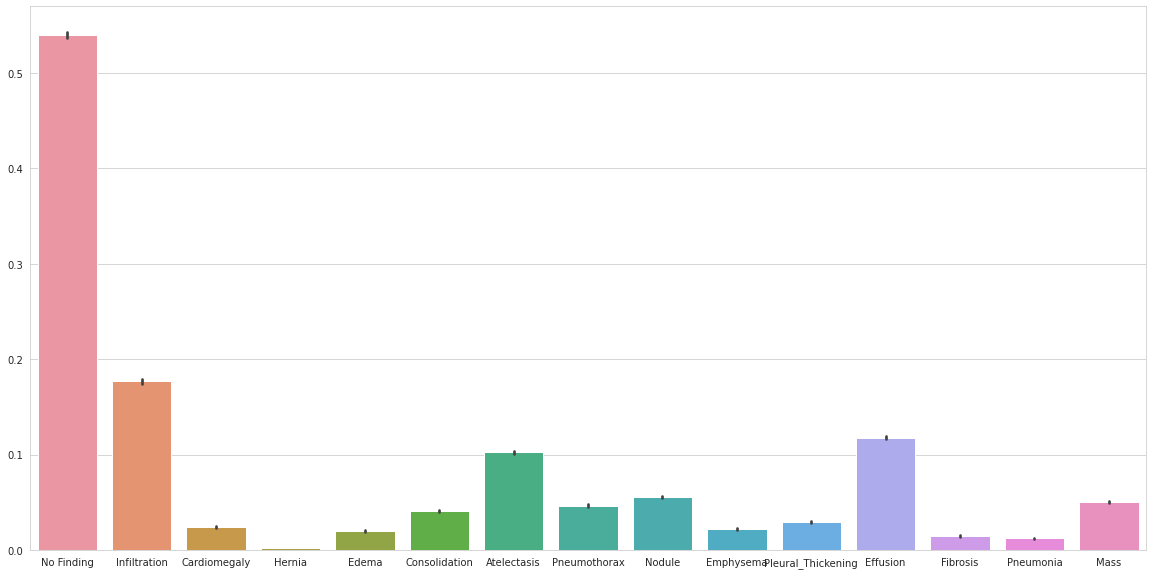

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = file_target_df.loc[:, classes_list])

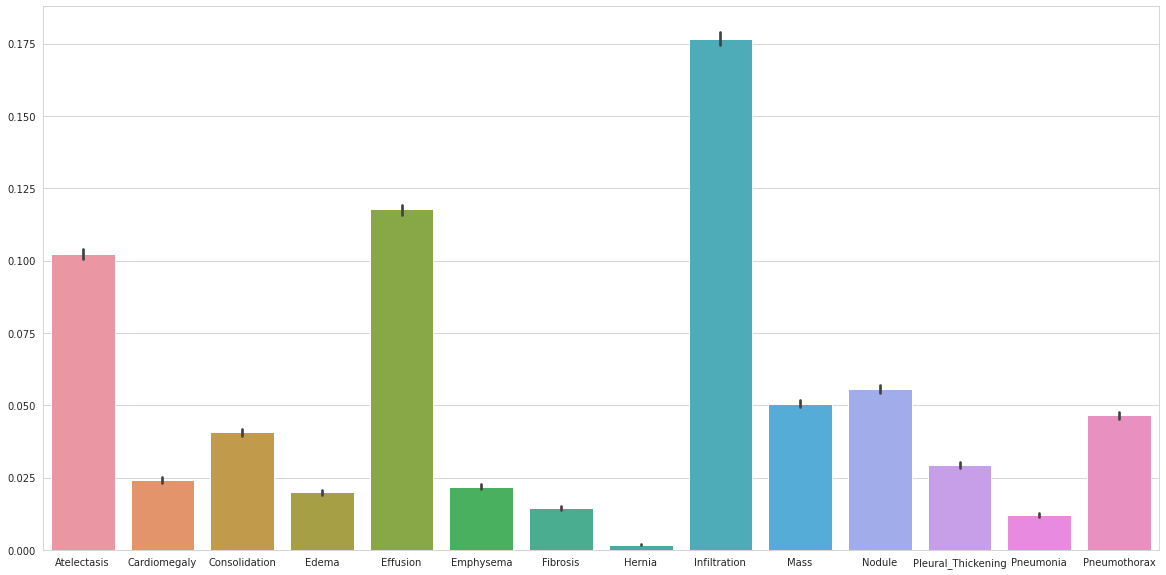

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = file_target_df.loc[:, diseases_list])

In [ ]:
for clss in classes_list:
    print(len(file_target_df[file_target_df[clss]==1]), clss)

60361 No Finding
19742 Infiltration
2700 Cardiomegaly
201 Hernia
2224 Edema
4552 Consolidation
11429 Atelectasis
5196 Pneumothorax
6213 Nodule
2435 Emphysema
3274 Pleural_Thickening
13158 Effusion
1620 Fibrosis
1360 Pneumonia
5642 Mass


In [ ]:
target = 'Hernia'

In [ ]:
def get_filename_class_tr_val_ts(data, target, diseases, BATCH_SIZE, REDUCE_DATA_SET_TO):

    data_df = data[['filename', 'No Finding', target]]

    mask = data_df[target] == 1
    data_df.loc[mask, 'class'] = target
    data_df.loc[~mask, 'class'] = 'healthy'
    print('All Sample:   ', dict(data_df['class'].value_counts()))


    # get sample without a lot of diseases
    # make models more strength to other diseases
    diseases_now = diseases[:]
    diseases_now.remove(target)
    data_df['Other_Desises'] = data[diseases_now].gt(0).sum(axis=1)
    data_df = data_df.sort_values(by=['Other_Desises'], ascending=True)
    data_df.reset_index(drop=True, inplace=True)


    # make helthy_sample / desise_sample in proportion 1/1
    healthy_indexes = list(data_df[data_df['class'] == 'healthy'].index)
    target_indexes = list(data_df[data_df['class'] == target].index)
    healthy_indexes = healthy_indexes[:(len(target_indexes)*1)]


    reduced_set_index = healthy_indexes[ : int(REDUCE_DATA_SET_TO/2)] + target_indexes[:int(REDUCE_DATA_SET_TO/2)]
    data_df = data_df.loc[reduced_set_index, :]
    data_df.drop(columns=['No Finding', target], inplace=True, axis=1)
    data_df = shuffle(data_df, random_state=42)
    data_df.reset_index(drop=True, inplace=True)
    print('Reduced Samp: ', dict(data_df['class'].value_counts()), '\n')


    data_df['class'] = data_df['class'].map({'healthy':0, target:1})


    train_df, test_df = train_test_split(data_df, test_size=0.1, random_state=42, stratify=data_df['class'])
    train_df, val_df  = train_test_split(train_df, test_size=0.1, random_state=42, stratify=train_df['class'])
    train_df = train_df[ : train_df.shape[0] // BATCH_SIZE * BATCH_SIZE]
    val_df = val_df[ : val_df.shape[0] // BATCH_SIZE * BATCH_SIZE]
    test_df = test_df[ : test_df.shape[0] // BATCH_SIZE * BATCH_SIZE]
    print('Train Sample: ', dict(train_df['class'].value_counts(dropna=False)))
    print('Valid Sample: ', dict(val_df['class'].value_counts(dropna=False)))
    print('Test  Sample: ', dict(test_df['class'].value_counts(dropna=False)), '\n')
    return train_df, val_df, test_df


train_data, val_data, test_data = get_filename_class_tr_val_ts(file_target_df, target, diseases_list, BATCH_SIZE, REDUCE_DATA_SET_TO)

All Sample:    {'healthy': 111596, 'Hernia': 201}
Reduced Samp:  {'Hernia': 201, 'healthy': 201} 

Train Sample:  {1: 160, 0: 160}
Valid Sample:  {1: 17, 0: 15}
Test  Sample:  {1: 20, 0: 20} 



In [ ]:
train_data[:3]

,filename,class,Other_Desises
75,/content/data/images_002/images/00003029_006.png,1,0
335,/content/data/images_009/images/00020915_000.png,1,0
164,/content/data/images_008/images/00018026_000.png,1,1


In [ ]:
init_time = datetime.datetime.now()

def get_images_and_labels_arrays(df, verbose):
    images = []
    for file in df['filename']:
        image = cv2.imread(file)
        image = cv2.resize(image,IMAGE_SIZE)
        images.append(image)

    images = np.array(images)
    labels = df.loc[:, 'class']


    if verbose:
        print(f'Set shape: {images.shape},  {labels.shape}')

    return images, labels


train_images, train_labels = get_images_and_labels_arrays(train_data, VERBOSE)
val_images, val_labels = get_images_and_labels_arrays(val_data, VERBOSE)
test_images, test_labels = get_images_and_labels_arrays(test_data, VERBOSE)


requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')

Set shape: (320, 224, 224, 3),  (320,)
Set shape: (32, 224, 224, 3),  (32,)
Set shape: (40, 224, 224, 3),  (40,)

Required time:  0:00:06.135565



In [ ]:
def create_model():
    with tf.device('/gpu:0'):
        pretrained_model = tf.keras.applications.VGG19(
            weights='imagenet',
            include_top=False ,
            input_shape=[*IMAGE_SIZE, 3]
        )
        pretrained_model.trainable = False

        # Input
        input_layer = layers.Input(shape=(*IMAGE_SIZE, 3))

        # Augmentaton
        x = layers.experimental.preprocessing.RandomFlip('horizontal')(input_layer)
        x = layers.experimental.preprocessing.RandomContrast(0.05)(x)
        x = layers.experimental.preprocessing.RandomZoom(0.05)(x)
        x = layers.experimental.preprocessing.RandomRotation(0.03)(x)
#         x = layers.experimental.preprocessing.RandomTranslation(0.05, 0.05)(x)
#         x = layers.experimental.preprocessing.CenterCrop(width=0.05, height=0.05)(x)
        x = layers.experimental.preprocessing.Normalization(axis=None)(x)

        # Pretrained model
        x = pretrained_model(x)

        # Global Average Pooling
        x = layers.GlobalAveragePooling2D()(x)
        x = layers.Flatten()(x)

        # Head
        x = layers.Dense(2048,activation='relu')(x)
        x = layers.Dropout(0.3)(x)

        # Output
        output = layers.Dense(units=2,
                              activation='softmax')(x)

        model = Model(input_layer, output)

        # Compile
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        return model

model = create_model()
if VERBOSE:
    model.summary()

80134624/80134624 [==============================] - 0s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_contrast (RandomCont  (None, 224, 224, 3)      0         
 rast)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 normalization (Normalizatio  (None, 224, 224, 3)      3     

In [ ]:
def get_trained_model(model, train_X, train_y, val_X, val_y, batch, epochs, verbose):
    init_time = datetime.datetime.now()

    early_stopping = EarlyStopping(monitor="val_accuracy", patience=5, mode="max")
    checkpoint = ModelCheckpoint("acc-{val_accuracy:.2f}.h5", monitor="val_accuracy", verbose=verbose,
                                 save_best_only=True, save_weights_only=True, mode="max")
    learning_rate_reduction = ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=2,
                                                min_lr=1e-6, verbose=verbose, mode="max")


    trained = model.fit(
            train_X, train_y,
            validation_data = (val_images, val_labels),
            batch_size = batch,
            epochs=epochs,
            callbacks=[checkpoint, early_stopping, learning_rate_reduction ],
            verbose=0
            )

    requared_time = datetime.datetime.now() - init_time
    print(f'\nRequired time:  {str(requared_time)}\n')
    return model

trained_model = get_trained_model(model, train_images, train_labels, val_images, val_labels, BATCH_SIZE, EPOCHS, VERBOSE)


Epoch 1: val_accuracy improved from -inf to 0.65625, saving model to acc-0.66.h5

Epoch 2: val_accuracy improved from 0.65625 to 0.75000, saving model to acc-0.75.h5

Epoch 3: val_accuracy did not improve from 0.75000

Epoch 4: val_accuracy did not improve from 0.75000

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 5: val_accuracy did not improve from 0.75000

Epoch 6: val_accuracy did not improve from 0.75000

Epoch 6: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 7: val_accuracy did not improve from 0.75000

Required time:  0:00:33.245429



2/2 [==============================] - 0s 162ms/step

accuracy: 0.800000011920929   loss:  0.6419026851654053 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.77      0.85      0.81        20

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40
 



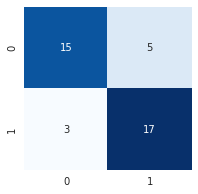

In [ ]:
def evaluate_model(model, test_X, test_y, verbose):
    test_loss, test_acc = model.evaluate(test_X, test_y, verbose=0)
    y_hat = np.argmax(model.predict(test_X), axis=1)
    if verbose:
        print('\naccuracy:', test_acc, '  loss: ',test_loss, '\n')
        print(classification_report(test_y, y_hat), '\n')

        plt.figure(figsize=(3, 3))
        cm = confusion_matrix(test_y, y_hat)

        sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', cbar=False)
        plt.show()
    return test_acc

model_accuracy = evaluate_model(trained_model, test_images, test_labels, VERBOSE)

In [ ]:
del train_data
del val_data
del test_data
del model
del train_images
del train_labels
del val_images
del val_labels
del test_images
del test_labels

In [ ]:
trained_models = {}
models_accuracy = {}


ATELECTASIS 

All Sample:    {'healthy': 100368, 'Atelectasis': 11429}
Reduced Samp:  {'Atelectasis': 5000, 'healthy': 5000} 

Train Sample:  {0: 4048, 1: 4048}
Valid Sample:  {1: 449, 0: 447}
Test  Sample:  {1: 500, 0: 500} 


Set shape: (8096, 224, 224, 3),  (8096,)
Set shape: (896, 224, 224, 3),  (896,)
Set shape: (1000, 224, 224, 3),  (1000,)

Required time:  0:02:31.965336




Epoch 1: val_accuracy improved from -inf to 0.66406, saving model to acc-0.66.h5

Epoch 2: val_accuracy improved from 0.66406 to 0.68750, saving model to acc-0.69.h5

Epoch 3: val_accuracy did not improve from 0.68750

Epoch 4: val_accuracy did not improve from 0.68750

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 5: val_accuracy improved from 0.68750 to 0.71094, saving model to acc-0.71.h5

Epoch 6: val_accuracy did not improve from 0.71094

Epoch 7: val_accuracy did not improve from 0.71094

Epoch 7: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 8: val_accuracy did not improve from 0.71094

Epoch 9: val_accuracy did not improve from 0.71094

Epoch 9: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 10: val_accuracy did not improve from 0.71094

Required time:  0:14:19.311288



32/32 [==============================] - 6s 187ms/step

accuracy: 0.6869999766349792   loss:  0.592619001865387 

              precision    recall  f1-score   support

           0       0.73      0.59      0.65       500
           1       0.66      0.78      0.71       500

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.68      1000
weighted avg       0.69      0.69      0.68      1000
 



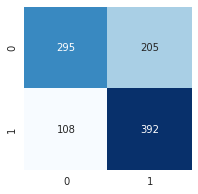


Required time for Atelectasis:  0:17:10.041383





CARDIOMEGALY 

All Sample:    {'healthy': 109097, 'Cardiomegaly': 2700}
Reduced Samp:  {'healthy': 2700, 'Cardiomegaly': 2700} 

Train Sample:  {1: 2184, 0: 2184}
Valid Sample:  {0: 242, 1: 238}
Test  Sample:  {1: 269, 0: 267} 


Set shape: (4368, 224, 224, 3),  (4368,)
Set shape: (480, 224, 224, 3),  (480,)
Set shape: (536, 224, 224, 3),  (536,)

Required time:  0:01:26.895898




Epoch 1: val_accuracy improved from -inf to 0.64583, saving model to acc-0.65.h5

Epoch 2: val_accuracy improved from 0.64583 to 0.76667, saving model to acc-0.77.h5

Epoch 3: val_accuracy did not improve from 0.76667

Epoch 4: val_accuracy did not improve from 0.76667

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 5: val_accuracy did not improve from 0.76667

Epoch 6: val_accuracy did not improve from 0.76667

Epoch 6: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 7: val_accuracy did not improve from 0.76667

Required time:  0:05:24.452033



17/17 [==============================] - 3s 185ms/step

accuracy: 0.7182835936546326   loss:  0.5498341917991638 

              precision    recall  f1-score   support

           0       0.77      0.62      0.69       267
           1       0.68      0.82      0.74       269

    accuracy                           0.72       536
   macro avg       0.73      0.72      0.72       536
weighted avg       0.73      0.72      0.72       536
 



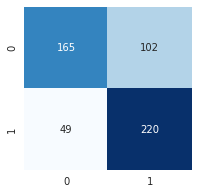


Required time for Cardiomegaly:  0:07:06.208207





CONSOLIDATION 

All Sample:    {'healthy': 107245, 'Consolidation': 4552}
Reduced Samp:  {'Consolidation': 4552, 'healthy': 4552} 

Train Sample:  {0: 3686, 1: 3682}
Valid Sample:  {1: 408, 0: 408}
Test  Sample:  {0: 453, 1: 451} 


Set shape: (7368, 224, 224, 3),  (7368,)
Set shape: (816, 224, 224, 3),  (816,)
Set shape: (904, 224, 224, 3),  (904,)

Required time:  0:02:17.357455




Epoch 1: val_accuracy improved from -inf to 0.75735, saving model to acc-0.76.h5

Epoch 2: val_accuracy did not improve from 0.75735

Epoch 3: val_accuracy improved from 0.75735 to 0.76716, saving model to acc-0.77.h5

Epoch 4: val_accuracy improved from 0.76716 to 0.76838, saving model to acc-0.77.h5

Epoch 5: val_accuracy did not improve from 0.76838

Epoch 6: val_accuracy did not improve from 0.76838

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 7: val_accuracy improved from 0.76838 to 0.76961, saving model to acc-0.77.h5

Epoch 8: val_accuracy did not improve from 0.76961

Epoch 9: val_accuracy did not improve from 0.76961

Epoch 9: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 10: val_accuracy improved from 0.76961 to 0.77206, saving model to acc-0.77.h5

Epoch 11: val_accuracy did not improve from 0.77206

Epoch 12: val_accuracy did not improve from 0.77206

Epoch 12: ReduceLROnPlateau reducing learning rate to 

29/29 [==============================] - 5s 186ms/step

accuracy: 0.758849561214447   loss:  0.5215602517127991 

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       453
           1       0.74      0.81      0.77       451

    accuracy                           0.76       904
   macro avg       0.76      0.76      0.76       904
weighted avg       0.76      0.76      0.76       904
 



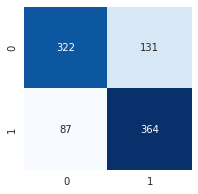


Required time for Consolidation:  0:22:15.274442





EDEMA 

All Sample:    {'healthy': 109573, 'Edema': 2224}
Reduced Samp:  {'Edema': 2224, 'healthy': 2224} 

Train Sample:  {0: 1801, 1: 1799}
Valid Sample:  {0: 200, 1: 200}
Test  Sample:  {0: 221, 1: 219} 


Set shape: (3600, 224, 224, 3),  (3600,)
Set shape: (400, 224, 224, 3),  (400,)
Set shape: (440, 224, 224, 3),  (440,)

Required time:  0:01:02.416353




Epoch 1: val_accuracy improved from -inf to 0.78750, saving model to acc-0.79.h5

Epoch 2: val_accuracy improved from 0.78750 to 0.79250, saving model to acc-0.79.h5

Epoch 3: val_accuracy did not improve from 0.79250

Epoch 4: val_accuracy did not improve from 0.79250

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 5: val_accuracy did not improve from 0.79250

Epoch 6: val_accuracy did not improve from 0.79250

Epoch 6: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 7: val_accuracy did not improve from 0.79250

Required time:  0:04:28.032830



14/14 [==============================] - 3s 184ms/step

accuracy: 0.824999988079071   loss:  0.4372021555900574 

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       221
           1       0.79      0.89      0.83       219

    accuracy                           0.82       440
   macro avg       0.83      0.83      0.82       440
weighted avg       0.83      0.82      0.82       440
 



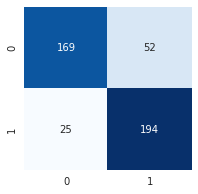


Required time for Edema:  0:05:42.515898





EFFUSION 

All Sample:    {'healthy': 98639, 'Effusion': 13158}
Reduced Samp:  {'Effusion': 5000, 'healthy': 5000} 

Train Sample:  {0: 4048, 1: 4048}
Valid Sample:  {1: 449, 0: 447}
Test  Sample:  {1: 500, 0: 500} 


Set shape: (8096, 224, 224, 3),  (8096,)
Set shape: (896, 224, 224, 3),  (896,)
Set shape: (1000, 224, 224, 3),  (1000,)

Required time:  0:02:31.571535




Epoch 1: val_accuracy improved from -inf to 0.77121, saving model to acc-0.77.h5

Epoch 2: val_accuracy did not improve from 0.77121

Epoch 3: val_accuracy did not improve from 0.77121

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 4: val_accuracy improved from 0.77121 to 0.79018, saving model to acc-0.79.h5

Epoch 5: val_accuracy improved from 0.79018 to 0.79911, saving model to acc-0.80.h5

Epoch 6: val_accuracy did not improve from 0.79911

Epoch 7: val_accuracy did not improve from 0.79911

Epoch 7: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 8: val_accuracy did not improve from 0.79911

Epoch 9: val_accuracy did not improve from 0.79911

Epoch 9: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 10: val_accuracy did not improve from 0.79911

Required time:  0:14:25.561937



32/32 [==============================] - 6s 187ms/step

accuracy: 0.7919999957084656   loss:  0.4913923442363739 

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       500
           1       0.76      0.86      0.80       500

    accuracy                           0.79      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.80      0.79      0.79      1000
 



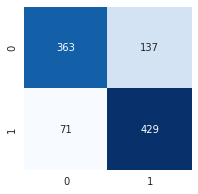


Required time for Effusion:  0:17:15.417354





EMPHYSEMA 

All Sample:    {'healthy': 109362, 'Emphysema': 2435}
Reduced Samp:  {'healthy': 2435, 'Emphysema': 2435} 

Train Sample:  {1: 1972, 0: 1972}
Valid Sample:  {0: 216, 1: 216}
Test  Sample:  {1: 242, 0: 238} 


Set shape: (3944, 224, 224, 3),  (3944,)
Set shape: (432, 224, 224, 3),  (432,)
Set shape: (480, 224, 224, 3),  (480,)

Required time:  0:01:10.348348




Epoch 1: val_accuracy improved from -inf to 0.67130, saving model to acc-0.67.h5

Epoch 2: val_accuracy improved from 0.67130 to 0.78009, saving model to acc-0.78.h5

Epoch 3: val_accuracy did not improve from 0.78009

Epoch 4: val_accuracy improved from 0.78009 to 0.78472, saving model to acc-0.78.h5

Epoch 5: val_accuracy improved from 0.78472 to 0.80787, saving model to acc-0.81.h5

Epoch 6: val_accuracy did not improve from 0.80787

Epoch 7: val_accuracy did not improve from 0.80787

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 8: val_accuracy did not improve from 0.80787

Epoch 9: val_accuracy did not improve from 0.80787

Epoch 9: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 10: val_accuracy did not improve from 0.80787

Required time:  0:06:59.161137



15/15 [==============================] - 3s 186ms/step

accuracy: 0.7770833373069763   loss:  0.4902302622795105 

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       238
           1       0.76      0.82      0.79       242

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480
 



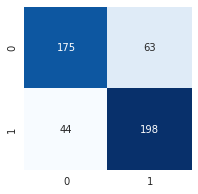


Required time for Emphysema:  0:08:22.128913





FIBROSIS 

All Sample:    {'healthy': 110177, 'Fibrosis': 1620}
Reduced Samp:  {'Fibrosis': 1620, 'healthy': 1620} 

Train Sample:  {0: 1312, 1: 1312}
Valid Sample:  {0: 144, 1: 144}
Test  Sample:  {1: 162, 0: 158} 


Set shape: (2624, 224, 224, 3),  (2624,)
Set shape: (288, 224, 224, 3),  (288,)
Set shape: (320, 224, 224, 3),  (320,)

Required time:  0:00:46.074829




Epoch 1: val_accuracy improved from -inf to 0.63542, saving model to acc-0.64.h5

Epoch 2: val_accuracy improved from 0.63542 to 0.68403, saving model to acc-0.68.h5

Epoch 3: val_accuracy did not improve from 0.68403

Epoch 4: val_accuracy did not improve from 0.68403

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 5: val_accuracy improved from 0.68403 to 0.69097, saving model to acc-0.69.h5

Epoch 6: val_accuracy improved from 0.69097 to 0.71181, saving model to acc-0.71.h5

Epoch 7: val_accuracy did not improve from 0.71181

Epoch 8: val_accuracy did not improve from 0.71181

Epoch 8: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 9: val_accuracy did not improve from 0.71181

Epoch 10: val_accuracy did not improve from 0.71181

Epoch 10: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 11: val_accuracy did not improve from 0.71181

Required time:  0:05:08.634877



10/10 [==============================] - 2s 178ms/step

accuracy: 0.6968749761581421   loss:  0.600759744644165 

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       158
           1       0.74      0.62      0.68       162

    accuracy                           0.70       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.70      0.70      0.70       320
 



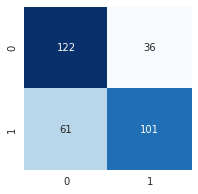


Required time for Fibrosis:  0:06:21.015018





HERNIA 

All Sample:    {'healthy': 111596, 'Hernia': 201}
Reduced Samp:  {'Hernia': 201, 'healthy': 201} 

Train Sample:  {1: 160, 0: 160}
Valid Sample:  {1: 17, 0: 15}
Test  Sample:  {1: 20, 0: 20} 


Set shape: (320, 224, 224, 3),  (320,)
Set shape: (32, 224, 224, 3),  (32,)
Set shape: (40, 224, 224, 3),  (40,)

Required time:  0:00:05.496208




Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to acc-0.75.h5

Epoch 2: val_accuracy improved from 0.75000 to 0.84375, saving model to acc-0.84.h5

Epoch 3: val_accuracy did not improve from 0.84375

Epoch 4: val_accuracy did not improve from 0.84375

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 5: val_accuracy did not improve from 0.84375

Epoch 6: val_accuracy did not improve from 0.84375

Epoch 6: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 7: val_accuracy did not improve from 0.84375

Required time:  0:00:26.130137



2/2 [==============================] - 0s 171ms/step

accuracy: 0.7250000238418579   loss:  0.8469709157943726 

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.70      0.80      0.74        20

    accuracy                           0.73        40
   macro avg       0.73      0.73      0.72        40
weighted avg       0.73      0.72      0.72        40
 



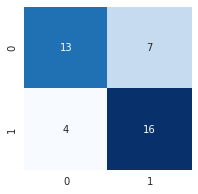


Required time for Hernia:  0:00:38.482197





INFILTRATION 

All Sample:    {'healthy': 92055, 'Infiltration': 19742}
Reduced Samp:  {'Infiltration': 5000, 'healthy': 5000} 

Train Sample:  {0: 4048, 1: 4048}
Valid Sample:  {1: 449, 0: 447}
Test  Sample:  {1: 500, 0: 500} 


Set shape: (8096, 224, 224, 3),  (8096,)
Set shape: (896, 224, 224, 3),  (896,)
Set shape: (1000, 224, 224, 3),  (1000,)

Required time:  0:02:33.495883




Epoch 1: val_accuracy improved from -inf to 0.57478, saving model to acc-0.57.h5

Epoch 2: val_accuracy improved from 0.57478 to 0.59598, saving model to acc-0.60.h5

Epoch 3: val_accuracy did not improve from 0.59598

Epoch 4: val_accuracy did not improve from 0.59598

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 5: val_accuracy did not improve from 0.59598

Epoch 6: val_accuracy improved from 0.59598 to 0.59710, saving model to acc-0.60.h5

Epoch 7: val_accuracy improved from 0.59710 to 0.61272, saving model to acc-0.61.h5

Epoch 8: val_accuracy did not improve from 0.61272

Epoch 9: val_accuracy did not improve from 0.61272

Epoch 9: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 10: val_accuracy did not improve from 0.61272

Epoch 11: val_accuracy improved from 0.61272 to 0.61607, saving model to acc-0.62.h5

Epoch 12: val_accuracy did not improve from 0.61607

Epoch 13: val_accuracy improved from 0.61607 to 0.6183

32/32 [==============================] - 6s 185ms/step

accuracy: 0.609000027179718   loss:  0.6557384133338928 

              precision    recall  f1-score   support

           0       0.64      0.50      0.56       500
           1       0.59      0.72      0.65       500

    accuracy                           0.61      1000
   macro avg       0.61      0.61      0.60      1000
weighted avg       0.61      0.61      0.60      1000
 



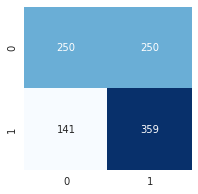


Required time for Infiltration:  0:30:17.525416





MASS 

All Sample:    {'healthy': 106155, 'Mass': 5642}
Reduced Samp:  {'Mass': 5000, 'healthy': 5000} 

Train Sample:  {0: 4048, 1: 4048}
Valid Sample:  {1: 449, 0: 447}
Test  Sample:  {1: 500, 0: 500} 


Set shape: (8096, 224, 224, 3),  (8096,)
Set shape: (896, 224, 224, 3),  (896,)
Set shape: (1000, 224, 224, 3),  (1000,)

Required time:  0:02:28.048579




Epoch 1: val_accuracy improved from -inf to 0.67634, saving model to acc-0.68.h5

Epoch 2: val_accuracy improved from 0.67634 to 0.70424, saving model to acc-0.70.h5

Epoch 3: val_accuracy did not improve from 0.70424

Epoch 4: val_accuracy improved from 0.70424 to 0.71205, saving model to acc-0.71.h5

Epoch 5: val_accuracy did not improve from 0.71205

Epoch 6: val_accuracy did not improve from 0.71205

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 7: val_accuracy improved from 0.71205 to 0.72656, saving model to acc-0.73.h5

Epoch 8: val_accuracy did not improve from 0.72656

Epoch 9: val_accuracy did not improve from 0.72656

Epoch 9: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 10: val_accuracy did not improve from 0.72656

Epoch 11: val_accuracy improved from 0.72656 to 0.72879, saving model to acc-0.73.h5

Epoch 12: val_accuracy did not improve from 0.72879

Epoch 13: val_accuracy did not improve from 0.72879

E

32/32 [==============================] - 6s 185ms/step

accuracy: 0.6740000247955322   loss:  0.6057727336883545 

              precision    recall  f1-score   support

           0       0.67      0.70      0.68       500
           1       0.68      0.65      0.67       500

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000
 



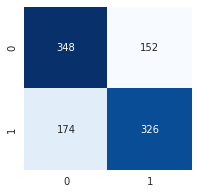


Required time for Mass:  0:31:35.811847





NODULE 

All Sample:    {'healthy': 105584, 'Nodule': 6213}
Reduced Samp:  {'Nodule': 5000, 'healthy': 5000} 

Train Sample:  {0: 4048, 1: 4048}
Valid Sample:  {1: 449, 0: 447}
Test  Sample:  {1: 500, 0: 500} 


Set shape: (8096, 224, 224, 3),  (8096,)
Set shape: (896, 224, 224, 3),  (896,)
Set shape: (1000, 224, 224, 3),  (1000,)

Required time:  0:02:31.269221




Epoch 1: val_accuracy improved from -inf to 0.61049, saving model to acc-0.61.h5

Epoch 2: val_accuracy improved from 0.61049 to 0.61942, saving model to acc-0.62.h5

Epoch 3: val_accuracy did not improve from 0.61942

Epoch 4: val_accuracy did not improve from 0.61942

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 5: val_accuracy improved from 0.61942 to 0.63058, saving model to acc-0.63.h5

Epoch 6: val_accuracy improved from 0.63058 to 0.63281, saving model to acc-0.63.h5

Epoch 7: val_accuracy improved from 0.63281 to 0.63616, saving model to acc-0.64.h5

Epoch 8: val_accuracy did not improve from 0.63616

Epoch 9: val_accuracy did not improve from 0.63616

Epoch 9: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 10: val_accuracy did not improve from 0.63616

Epoch 11: val_accuracy did not improve from 0.63616

Epoch 11: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 12: val_accuracy did n

32/32 [==============================] - 6s 186ms/step

accuracy: 0.6420000195503235   loss:  0.6466224789619446 

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       500
           1       0.64      0.64      0.64       500

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.64      0.64      0.64      1000
 



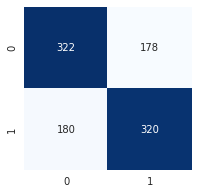


Required time for Nodule:  0:20:06.925726





PLEURAL_THICKENING 

All Sample:    {'healthy': 108523, 'Pleural_Thickening': 3274}
Reduced Samp:  {'healthy': 3274, 'Pleural_Thickening': 3274} 

Train Sample:  {1: 2652, 0: 2644}
Valid Sample:  {0: 292, 1: 292}
Test  Sample:  {0: 325, 1: 323} 


Set shape: (5296, 224, 224, 3),  (5296,)
Set shape: (584, 224, 224, 3),  (584,)
Set shape: (648, 224, 224, 3),  (648,)

Required time:  0:01:32.874699




Epoch 1: val_accuracy improved from -inf to 0.69178, saving model to acc-0.69.h5

Epoch 2: val_accuracy did not improve from 0.69178

Epoch 3: val_accuracy improved from 0.69178 to 0.69349, saving model to acc-0.69.h5

Epoch 4: val_accuracy did not improve from 0.69349

Epoch 5: val_accuracy did not improve from 0.69349

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 6: val_accuracy improved from 0.69349 to 0.70034, saving model to acc-0.70.h5

Epoch 7: val_accuracy improved from 0.70034 to 0.70377, saving model to acc-0.70.h5

Epoch 8: val_accuracy did not improve from 0.70377

Epoch 9: val_accuracy did not improve from 0.70377

Epoch 9: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 10: val_accuracy did not improve from 0.70377

Epoch 11: val_accuracy did not improve from 0.70377

Epoch 11: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 12: val_accuracy did not improve from 0.70377

Required

21/21 [==============================] - 4s 183ms/step

accuracy: 0.7052469253540039   loss:  0.5654659867286682 

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       325
           1       0.69      0.75      0.72       323

    accuracy                           0.71       648
   macro avg       0.71      0.71      0.70       648
weighted avg       0.71      0.71      0.70       648
 



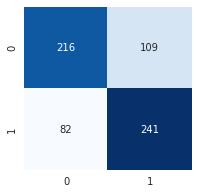


Required time for Pleural_Thickening:  0:13:11.278229





PNEUMONIA 

All Sample:    {'healthy': 110437, 'Pneumonia': 1360}
Reduced Samp:  {'healthy': 1360, 'Pneumonia': 1360} 

Train Sample:  {1: 1101, 0: 1099}
Valid Sample:  {0: 121, 1: 119}
Test  Sample:  {1: 136, 0: 136} 


Set shape: (2200, 224, 224, 3),  (2200,)
Set shape: (240, 224, 224, 3),  (240,)
Set shape: (272, 224, 224, 3),  (272,)

Required time:  0:00:40.618453




Epoch 1: val_accuracy improved from -inf to 0.71667, saving model to acc-0.72.h5

Epoch 2: val_accuracy did not improve from 0.71667

Epoch 3: val_accuracy did not improve from 0.71667

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 4: val_accuracy did not improve from 0.71667

Epoch 5: val_accuracy did not improve from 0.71667

Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 6: val_accuracy did not improve from 0.71667

Required time:  0:02:21.674616



9/9 [==============================] - 2s 187ms/step

accuracy: 0.7352941036224365   loss:  0.5811629295349121 

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       136
           1       0.74      0.74      0.74       136

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272
 



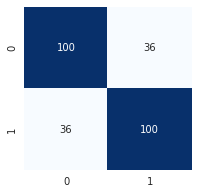


Required time for Pneumonia:  0:03:14.659719





PNEUMOTHORAX 

All Sample:    {'healthy': 106601, 'Pneumothorax': 5196}
Reduced Samp:  {'Pneumothorax': 5000, 'healthy': 5000} 

Train Sample:  {0: 4048, 1: 4048}
Valid Sample:  {1: 449, 0: 447}
Test  Sample:  {1: 500, 0: 500} 


Set shape: (8096, 224, 224, 3),  (8096,)
Set shape: (896, 224, 224, 3),  (896,)
Set shape: (1000, 224, 224, 3),  (1000,)

Required time:  0:02:28.843512




Epoch 1: val_accuracy improved from -inf to 0.70201, saving model to acc-0.70.h5

Epoch 2: val_accuracy improved from 0.70201 to 0.75335, saving model to acc-0.75.h5

Epoch 3: val_accuracy did not improve from 0.75335

Epoch 4: val_accuracy improved from 0.75335 to 0.76562, saving model to acc-0.77.h5

Epoch 5: val_accuracy improved from 0.76562 to 0.77009, saving model to acc-0.77.h5

Epoch 6: val_accuracy did not improve from 0.77009

Epoch 7: val_accuracy did not improve from 0.77009

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 8: val_accuracy did not improve from 0.77009

Epoch 9: val_accuracy improved from 0.77009 to 0.77344, saving model to acc-0.77.h5

Epoch 10: val_accuracy did not improve from 0.77344

Epoch 11: val_accuracy did not improve from 0.77344

Epoch 11: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 12: val_accuracy did not improve from 0.77344

Epoch 13: val_accuracy did not improve from 0.77344



32/32 [==============================] - 6s 188ms/step

accuracy: 0.7770000100135803   loss:  0.4740689992904663 

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       500
           1       0.76      0.82      0.79       500

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000
 



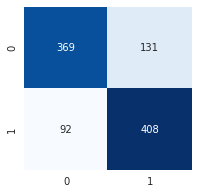


Required time for Pneumothorax:  0:23:13.043244






In [ ]:
for disease in diseases_list:
    init_time = datetime.datetime.now()

    print('')
    print(f'{disease.upper()} \n')
    train_data, val_data, test_data = get_filename_class_tr_val_ts(file_target_df, disease, diseases_list, BATCH_SIZE, REDUCE_DATA_SET_TO)
    print('')
    init_time = datetime.datetime.now()
    train_images, train_labels = get_images_and_labels_arrays(train_data, VERBOSE)
    val_images, val_labels = get_images_and_labels_arrays(val_data, VERBOSE)
    test_images, test_labels = get_images_and_labels_arrays(test_data, VERBOSE)
    requared_time = datetime.datetime.now() - init_time
    print(f'\nRequired time:  {str(requared_time)}\n')

    del train_data
    del val_data
    del test_data

    model = create_model()

    model = get_trained_model(model, train_images, train_labels, val_images, val_labels, BATCH_SIZE, EPOCHS, VERBOSE)

    trained_models[disease] = model

    models_accuracy[disease] = evaluate_model(model, test_images, test_labels, VERBOSE)
    del model
    del train_images
    del train_labels
    del val_images
    del val_labels
    del test_images
    del test_labels

    requared_time = datetime.datetime.now() - init_time
    print(f'\nRequired time for {disease}:  {str(requared_time)}\n')

    print('\n','='*80,'\n\n')

In [ ]:
accuracies = []
for diseas, accuracy in models_accuracy.items():
    accuracies.append(accuracy)
    print(accuracy, diseas)

np.array(accuracies)
print('\n', np.array(accuracies).mean(), ' - Average accuracy:')

0.6869999766349792 Atelectasis
0.7182835936546326 Cardiomegaly
0.758849561214447 Consolidation
0.824999988079071 Edema
0.7919999957084656 Effusion
0.7770833373069763 Emphysema
0.6968749761581421 Fibrosis
0.7250000238418579 Hernia
0.609000027179718 Infiltration
0.6740000247955322 Mass
0.6420000195503235 Nodule
0.7052469253540039 Pleural_Thickening
0.7352941036224365 Pneumonia
0.7770000100135803 Pneumothorax

 0.7230451830795833  - Average accuracy:
